In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Value Counts

One of the most useful methods that I have found for quickly getting a picture of a dataset is the value counts method.

The value counts method is a fairly simple method that is inbuilt to the pandas library. Value counts simple counts the number of times a particular value appears in a given column of a dataframe. This method is most useful for analyzing a column where a given value is repeated many times. This can help to give a picture of what the data looks like and showcase the relative proportion of certain values.

here is an example using the Ao3 database and using the value counts method on the complete column to determine what percent of the given works are complete. A work being complete refers wether or not the author has marked it as such and generally means that the work has conclude, the story has ended, and that the work will no longer be updating.

In [2]:
Works = pd.read_csv("works-20210226.csv")
Tags = pd.read_csv("tags-20210226.csv")

In [3]:
Works["complete"].value_counts() #gets us the count but not the percentage

True     6111220
False    1158473
Name: complete, dtype: int64

To use the value counts method we simply use it like any other object orientation method after signifying the part of the dataset we want to see.

In [4]:
Works["complete"].value_counts(normalize = True) #we now have the ratio just need percent

True     0.840643
False    0.159357
Name: complete, dtype: float64

In [5]:
Works["complete"].value_counts(normalize = True) * 100

True     84.064348
False    15.935652
Name: complete, dtype: float64

Here we can see the usage of the value counts method to get first the total numbers of both complete and incomplete works. As we want a percentage we then use add the normalize = True line into the value counts method to signify to the program that we want relative proportion of the whole as opposed to total numbers. Once we have the proportion it is simple to just multiply by 100 to get the percentage.

# Describe

The describe method is a very useful method for quickly understand the distribution of a numeric column

The describe method when applied to a dataset simply outputs the statistical features of that data. For example the mean, total count, minimum and maximum values for the data. This allows the user to quickly understand the distribution of a variety of numeric datasets.

Here is an example using the Ao3 dataset to showcase the distribution in work size.

In [6]:
Works["word_count"].describe()

count    7.267425e+06
mean     7.213851e+03
std      2.240520e+04
min      0.000000e+00
25%      9.850000e+02
50%      2.130000e+03
75%      5.200000e+03
max      5.078036e+06
Name: word_count, dtype: float64

To use the describe method simply apply it a section of the dataset that is numeric in nature.

# Plots

Plotting your data or a section of your data is a vary valuable tool to be able to better see the various patterns and full scope of your data.

Unlike simple value counts or describe a plot will allow for the user to see the entire scope of the dataset at once and can be used to identiy patterns or trends.

Here is an example of some plots from the Ao3 dataset

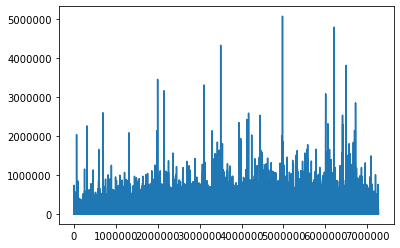

In [9]:
plt.plot(Works["word_count"])

here we can see a plot of the word count. With this simple plot the y axis is the word count and the x axis is the index value of the work in question. This visualization as a simple line plot is not particularlly well suited for this analysis but there are many different types of plots avaible such as a scatter plot.

In [12]:
Works["datetime"] = pd.to_datetime(Works["creation date"])
Works["datetime"].head()

0   2021-02-26
1   2021-02-26
2   2021-02-26
3   2021-02-26
4   2021-02-26
Name: datetime, dtype: datetime64[ns]

This set is simply to create a datetime object in the dataframe to better graph the size of works over time.

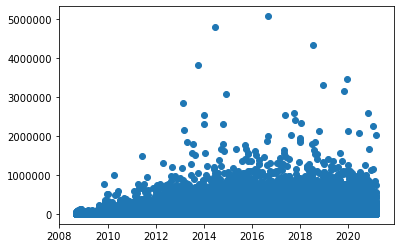

In [14]:
plt.scatter(Works["datetime"], Works["word_count"])

here with the scatter plot we can see a rough trend upwards for the size of works over time as the number of works of at least 100000 words is larger in 2020 than 2008 or 2010. Though there are very outliers that are considerably larger than their peers. 

# Group by 

The groupby method for pandas is very useful to see trends of a particular set of data in the terms of another.

Groupby allows one to view and analysis a particular set of data by allow us to correlate to different columns and apply analysis to both.

here is an example from a dataset of nuclear energy generation by country and by year.

In [3]:
df = pd.read_excel("nuclear-energy-generation.xlsx")

In [5]:
power = pd.read_csv("nuclear-energy-generation.csv")

There are several steps related to the process of managing the data to get it fit to use the groupby method. These are shown here.

This code is to seperate out all of the counties from the Entity column as Entity also as several such things as whole regions or the entire world and thus I one wants Electricity per country they need to be filtered out. First we tell the program that we are operating on the Entity column, we then tell the program to only select entities whose Code column is non empty as each country has a code but most non country entities do not have a code. The last part is to filter out the one non country entity that does have a code namely the world.

In [6]:
power["Countries"] = power["Entity"][power["Code"].notnull()][power["Code"] != "OWID_WRL"]
power

,Entity,Code,Year,Electricity from nuclear (TWh),Countries
0,ASEAN (Ember),NaN,2000,0.0,NaN
1,ASEAN (Ember),NaN,2001,0.0,NaN
2,ASEAN (Ember),NaN,2002,0.0,NaN
3,ASEAN (Ember),NaN,2003,0.0,NaN
4,ASEAN (Ember),NaN,2004,0.0,NaN
...,...,...,...,...,...
8511,Zimbabwe,ZWE,2017,0.0,Zimbabwe
8512,Zimbabwe,ZWE,2018,0.0,Zimbabwe
8513,Zimbabwe,ZWE,2019,0.0,Zimbabwe
8514,Zimbabwe,ZWE,2020,0.0,Zimbabwe


Here we create the Electricity column by selecting the Electricity from nuclear data so long as it comes from a valid country

In [7]:
power["Electricity"] = power["Electricity from nuclear (TWh)"][power["Countries"].notnull()]
power

,Entity,Code,Year,Electricity from nuclear (TWh),Countries,Electricity
0,ASEAN (Ember),NaN,2000,0.0,NaN,NaN
1,ASEAN (Ember),NaN,2001,0.0,NaN,NaN
2,ASEAN (Ember),NaN,2002,0.0,NaN,NaN
3,ASEAN (Ember),NaN,2003,0.0,NaN,NaN
4,ASEAN (Ember),NaN,2004,0.0,NaN,NaN
...,...,...,...,...,...,...
8511,Zimbabwe,ZWE,2017,0.0,Zimbabwe,0.0
8512,Zimbabwe,ZWE,2018,0.0,Zimbabwe,0.0
8513,Zimbabwe,ZWE,2019,0.0,Zimbabwe,0.0
8514,Zimbabwe,ZWE,2020,0.0,Zimbabwe,0.0


In [8]:
powerYear = power.groupby("Year")["Electricity"].sum()
powerYear

Year
1965      25.539724
1966      34.421290
1967      40.968014
1968      52.095165
1969      61.732411
1970      78.829657
1971     109.662176
1972     152.102150
1973     203.855577
1974     266.574094
1975     369.823192
1976     432.653409
1977     538.547826
1978     625.794394
1979     650.859881
1980     711.924215
1981     840.459775
1982     909.644533
1983    1029.896715
1984    1250.148410
1985    1479.600720
1986    1587.963443
1987    1725.907127
1988    1882.301567
1989    1939.045392
1990    2000.561926
1991    2096.132929
1992    2112.223822
1993    2184.764589
1994    2225.499712
1995    2321.222910
1996    2402.792973
1997    2388.452248
1998    2429.667852
1999    2521.632497
2000    2507.430000
2001    2573.710000
2002    2601.890000
2003    2577.710000
2004    2682.730000
2005    2686.950000
2006    2721.420000
2007    2666.920000
2008    2656.040000
2009    2619.000000
2010    2686.440000
2011    2575.350000
2012    2403.210000
2013    2418.440000
2014    2472.70

Here we can see how I grouped the data by year then called the sum function on the electricty column to get the totally electricity generation from nuclear per year.